In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 742k/742k [00:01<00:00, 682kB/s]

Extracting files...
Path to dataset files: C:\Users\souvik\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1


# Task 1: Load Data

In [7]:
Filepath = "D:\\MLOPS\\cardio_vasuclar_disease_aws_sm\\cardiovascular-disease-dataset\\versions\\1\\cardio_train.csv"

#load the dataset
import pandas as pd
df = pd.read_csv(Filepath, sep=';')
print("Dataset loaded successfully.")
print(df.head().to_string(index=False))

Dataset loaded successfully.
 id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
  0 18393       2     168    62.0    110     80            1     1      0     0       1       0
  1 20228       1     156    85.0    140     90            3     1      0     0       1       1
  2 18857       1     165    64.0    130     70            3     1      0     0       0       1
  3 17623       2     169    82.0    150    100            1     1      0     0       1       1
  4 17474       1     156    56.0    100     60            1     1      0     0       0       0


In [8]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Task 2: Perform EDA

In [9]:
cardio_df =df.drop(columns='id')
cardio_df['age']= cardio_df['age'] // 365
cardio_df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [13]:
# Obtain the feature of the individual who has the highest blood pressure ap_hi
highest_bp = cardio_df.loc[cardio_df['ap_hi'].idxmax()]
print("Individual with highest blood pressure (ap_hi):")
print(highest_bp)

Individual with highest blood pressure (ap_hi):
age               47.0
gender             1.0
height           169.0
weight            70.0
ap_hi          16020.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             1.0
Name: 40852, dtype: float64


In [17]:
# obtain the features of the individual who are older than 64.8 years old
older_individuals = cardio_df[cardio_df['age'] >= 64]
print("Individuals older than 64.8 years:")
older_individuals

Individuals older than 64.8 years:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23,64,2,156,45.0,110,60,1,1,0,0,1,0
38,64,2,162,72.0,130,80,1,1,1,0,1,1
70,64,1,155,57.0,120,80,1,1,0,0,1,1
72,64,1,156,58.0,110,70,1,1,0,0,1,0
142,64,2,169,73.0,140,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69862,64,2,166,99.0,120,80,1,1,0,0,1,1
69865,64,1,149,49.0,115,75,1,1,0,0,1,0
69896,64,1,150,69.0,120,80,1,1,0,0,1,1
69936,64,2,171,70.0,140,90,1,1,0,0,1,0


# Task 3: Visualize Dataset

# Task 4: Create Train Test Dataset

In [18]:
df_target= cardio_df['cardio']
df_features = cardio_df.drop(columns='cardio')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42) 


# Task 5: Train and test XGBoost Model in local mode ( SM build in algorithm not used)

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



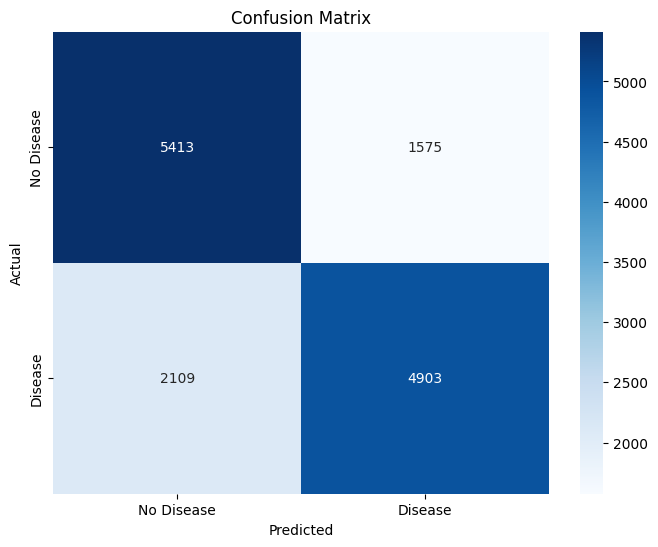

In [21]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# trial 2:

from xgboost import XGBClassifier
model1 = XGBClassifier(learning_rate=0.1,n_estimators=500,max_depth=20)
model1.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [27]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(objective='binary:logistic')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=4, n_jobs=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
 


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.731 total time=   0.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.727 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.728 total time=   0.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.732 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.727 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.729 total time=   0.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estima

In [28]:
# Use the best parameters to create a new model on train data
best_model = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)   

c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\xgboost\training.py:183: UserWarning: [17:19:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [29]:
#evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")


Best Model Accuracy: 0.74


In [30]:
#print Metrics from testing dataset
from sklearn.metrics import precision_score, recall_score, f1_score

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("precision_score = {}".format(precision_score(y_test, y_pred_best)))
print("recall_score = {}".format(recall_score(y_test, y_pred_best)))
print("f1_score = {}".format(f1_score(y_test, y_pred_best)))



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

precision_score = 0.7623255813953488
recall_score = 0.7012264689104393
f1_score = 0.7305006685485069


# Task 6: Perform Dimensionality reduction using PCA (Using Sagemaker)

In [46]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()
import os
role = os.environ.get("SAGEMAKER_EXECUTION_ROLE")


bucket='cardio-vascular-classification'
prefix = 'cardio_vasuclar_disease_aws_sm'



In [47]:
df_features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [63]:
import io
import numpy as np
import sagemaker.amazon.common as smac # sagemaker amazon common library

# code below converts the pandas dataframe to a numpy array and then to a dense tensor
# this is required for the PCA model to work in SageMaker

buf3 = io.BytesIO() # create an in-memory byte buffer.
df_matrix1=df_features.to_numpy()
smac.write_numpy_to_dense_tensor(buf3, df_matrix1, df_target.to_numpy()) # convert the pandas dataframe to a numpy array and then to a dense tensor
buf3.seek(0)
# when you write to in-memory byte arrays, it increments 1 every time you write to it, so you need to reset the pointer to the beginning of the buffer

0

In [49]:
import boto3
import os

key = 'pca'



s3 = boto3.resource('s3')
upload_path = os.path.join(prefix, 'train', key)

s3.Bucket(bucket).Object(upload_path).upload_fileobj(buf1)

print(f'Uploaded data to s3://{bucket}/{upload_path}')





Uploaded data to s3://cardio-vascular-classification/cardio_vasuclar_disease_aws_sm\train\pca


In [64]:
import boto3

# Make sure these variables are defined correctly before use:
bucket = 'cardio-vascular-classification'
prefix = 'cardio_vasuclar_disease_aws_sm'           # e.g. 'cardio_vasuclar_disease_aws_sm'
key = 'pca'

# buf1 should be a file-like object opened in binary mode
# Example:
# buf1 = open('localfile.pca', 'rb')

s3 = boto3.resource('s3')

# Join S3 key with forward slashes explicitly:
upload_path = f"{prefix}/train/{key}"

# Upload the file-like object to S3
s3.Bucket(bucket).Object(upload_path).upload_fileobj(buf3)

print(f'Uploaded data to s3://{bucket}/{upload_path}')


Uploaded data to s3://cardio-vascular-classification/cardio_vasuclar_disease_aws_sm/train/pca


In [50]:
# Create output placeholder location on S3 for PCA model artifacts
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifact will be uploaded to: {}'.format(output_location))

training artifact will be uploaded to: s3://cardio-vascular-classification/cardio_vasuclar_disease_aws_sm/output


In [52]:
#This is the container for PCA algorithm 

from sagemaker import image_uris
import boto3

region = boto3.Session().region_name
container = image_uris.retrieve("pca", region)

print(container)  # This will print the PCA container URI for your region


                         

382416733822.dkr.ecr.us-east-1.amazonaws.com/pca:1


In [67]:
#We have pass in the container, the type of instance that we would like to use for training
role= "arn:aws:iam::049000282775:role/aws-sm-s3-full-access"
pca = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.c4.xlarge',
                                    output_path=output_location,
                                    sagemaker_session=sagemaker_session)
# We can set hyperparameters for the PCA model

pca.set_hyperparameters(feature_dim=11, num_components=6,subtract_mean=False, mini_batch_size=100)



# pass in the training data from s3 to train the pca model
s3_train_data = 's3://cardio-vascular-classification/cardio_vasuclar_disease_aws_sm/train/pca'

pca.fit({'train': s3_train_data})



INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: pca-2025-08-02-16-27-20-572


2025-08-02 16:27:24 Starting - Starting the training job...
2025-08-02 16:27:59 Downloading - Downloading input data...
2025-08-02 16:28:24 Downloading - Downloading the training image.........
2025-08-02 16:30:11 Training - Training image download completed. Training in progress.
2025-08-02 16:30:11 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[08/02/2025 16:30:07 INFO 139756645304128] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[08/02/2025 16:30:07 IN

# Task 7: Deploy the trained PCA Model

In [68]:
# Deploy the PCA model to an endpoint
pca_reduction = pca.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')



INFO:sagemaker:Creating model with name: pca-2025-08-02-16-33-13-767
INFO:sagemaker:Creating endpoint-config with name pca-2025-08-02-16-33-13-767
INFO:sagemaker:Creating endpoint with name pca-2025-08-02-16-33-13-767


---------!

In [70]:

#content_type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv``
# and serializer/deserializer for the predictor 

from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
pca_reduction.content_type = 'text/csv'
pca_reduction.serializer = CSVSerializer()
pca_reduction.deserializer = JSONDeserializer()


In [71]:
# make predictions using the PCA model on the test data
result = pca_reduction.predict(np.array(df_features))
result


{'projections': [{'projection': [-0.2918943166732788,
    3.8795249462127686,
    -12.569599151611328,
    64.2719955444336,
    36.82741165161133,
    -217.74835205078125]},
  {'projection': [1.0949863195419312,
    -4.826216697692871,
    12.362133026123047,
    44.610755920410156,
    45.67888259887695,
    -240.92054748535156]},
  {'projection': [1.3400468826293945,
    1.951256513595581,
    -9.716133117675781,
    53.401405334472656,
    55.747581481933594,
    -222.87086486816406]},
  {'projection': [-0.42168867588043213,
    5.939473628997803,
    5.641444683074951,
    43.128013610839844,
    45.03940200805664,
    -257.1766357421875]},
  {'projection': [-0.1415417194366455,
    3.0517513751983643,
    -13.15958023071289,
    63.524627685546875,
    44.31868362426758,
    -192.61692810058594]},
  {'projection': [0.8849628567695618,
    -10.957599639892578,
    -2.934406280517578,
    50.490562438964844,
    40.325523376464844,
    -217.70022583007812]},
  {'projection': [0.925

In [74]:
# since the results are in json format we access the scores by iterating through the scores in the predictions

prediction=np.array([r['projection'] for r in result['projections']])

prediction

array([[-2.91894317e-01,  3.87952495e+00, -1.25695992e+01,
         6.42719955e+01,  3.68274117e+01, -2.17748352e+02],
       [ 1.09498632e+00, -4.82621670e+00,  1.23621330e+01,
         4.46107559e+01,  4.56788826e+01, -2.40920547e+02],
       [ 1.34004688e+00,  1.95125651e+00, -9.71613312e+00,
         5.34014053e+01,  5.57475815e+01, -2.22870865e+02],
       ...,
       [ 9.28801239e-01,  6.21535540e+00,  2.10291672e+01,
         4.52129021e+01,  7.46077423e+01, -2.82201416e+02],
       [ 9.06288624e-04, -8.22045708e+00, -2.96487427e+00,
         5.16851196e+01,  5.14375572e+01, -2.33901657e+02],
       [ 3.64138961e-01, -1.32926953e+00, -4.91930056e+00,
         6.41879730e+01,  4.39924889e+01, -2.27914413e+02]],
      shape=(70000, 6))

In [75]:
prediction.shape

(70000, 6)

In [76]:
# Clean up the endpoint after use
pca_reduction.delete_endpoint()


INFO:sagemaker:Deleting endpoint configuration with name: pca-2025-08-02-16-33-13-767
INFO:sagemaker:Deleting endpoint with name: pca-2025-08-02-16-33-13-767


# Task 8: Train and evaluate XGBoost Model using PCA transformed data using Sagemaker

In [77]:
prediction.shape

(70000, 6)

In [ ]:
#Convert the array to a pandas DataFrame the target variable i set as the first column and is followed by the features columns.
train_data=pd.DataFrame({'Target':df_target})
train_data 

,Target
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [80]:
for i in range(prediction.shape[1]):
    train_data[i]=prediction[:,i]
    

In [81]:
train_data.head()

,Target,0,1,2,3,4,5
0,0,-0.291894,3.879525,-12.569599,64.271996,36.827412,-217.748352
1,1,1.094986,-4.826217,12.362133,44.610756,45.678883,-240.920547
2,1,1.340047,1.951257,-9.716133,53.401405,55.747581,-222.870865
3,1,-0.421689,5.939474,5.641445,43.128014,45.039402,-257.176636
4,0,-0.141542,3.051751,-13.159580,63.524628,44.318684,-192.616928


In [82]:
train_data_size=int(0.9*train_data.shape[0])
train_data_size



63000

In [85]:
train_data[train_data_size:]

,Target,0,1,2,3,4,5
63000,0,-0.010144,9.402509,-14.055214,55.344486,41.880337,-203.885590
63001,0,-0.243226,11.317227,16.986187,39.951725,36.904278,-249.819855
63002,0,-0.156199,8.596904,-2.978077,60.792145,35.882881,-215.155029
63003,0,-0.466013,-3.123124,-6.355397,64.698219,36.935989,-218.087204
63004,0,-0.255336,6.711593,-9.422050,58.684101,42.522053,-223.782959
...,...,...,...,...,...,...,...
69995,0,-0.453052,1.847322,0.020885,63.182568,43.716408,-227.165237
69996,1,0.382377,-10.333011,48.469448,59.987156,49.753677,-252.469147
69997,1,0.928801,6.215355,21.029167,45.212902,74.607742,-282.201416
69998,1,0.000906,-8.220457,-2.964874,51.685120,51.437557,-233.901657


In [86]:
import sklearn

train_data=sklearn.utils.shuffle(train_data)
train,test,valid=train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size:]

In [87]:
train.shape, test.shape, valid.shape

((63000, 7), (3500, 7), (7000, 7))

In [88]:
X_test, y_test = test.drop(columns='Target'), test['Target']

In [89]:
train.to_csv('train_data.csv', header=False,index=False)
valid.to_csv('valid_data.csv',header=False, index=False)
# test.to_csv('test_data.csv',header=False, index=False)

In [90]:
prefix='XGBOOST_CLASSIFIER'
key='XGBOOST_CLASSIFIER'



In [91]:




# Upload file explicitly specifying forward slash path for S3 key
upload_key = f"{prefix}/{key}/train_data.csv"

with open('train_data.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(upload_key).upload_fileobj(f)

# The S3 URI points to the object you just uploaded
s3_train_data = f's3://{bucket}/{upload_key}'

print(f'uploaded data to {s3_train_data}')


uploaded data to s3://cardio-vascular-classification/XGBOOST_CLASSIFIER/XGBOOST_CLASSIFIER/train_data.csv


In [92]:

# Upload file explicitly specifying forward slash path for S3 key
upload_key = f"{prefix}/{key}/valid_data.csv"

with open('valid_data.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(upload_key).upload_fileobj(f)

# The S3 URI points to the object you just uploaded
s3_valid_data = f's3://{bucket}/{upload_key}'

print(f'uploaded data to {s3_valid_data}')


uploaded data to s3://cardio-vascular-classification/XGBOOST_CLASSIFIER/XGBOOST_CLASSIFIER/valid_data.csv


In [93]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifact will be uploaded to: {}'.format(output_location))  

training artifact will be uploaded to: s3://cardio-vascular-classification/XGBOOST_CLASSIFIER/output


In [ ]:
container = get_image_uri(boto3.Session().region_name, 'xgboost', '1.3-1')
from sagemaker.estimator import Estimator

xgb = Estimator(container,
                role,
                instance_count=1,
                instance_type='ml.m4.xlarge',
                output_path=output_location,
                sagemaker_session=sagemaker_session)

xgb.set_hyperparameters(max_depth=3,
                        objective='multi:softmax',
                        num_class=2,
                        eta=0.1,
                        num_round=100,
                        )

#xgb.fit({'train': s3_train_data, 'validation': s3_valid_data})




See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-08-02-17-01-32-447


2025-08-02 17:01:33 Starting - Starting the training job...
2025-08-02 17:02:01 Starting - Preparing the instances for training...
2025-08-02 17:02:27 Downloading - Downloading input data...
2025-08-02 17:02:57 Downloading - Downloading the training image...
2025-08-02 17:03:43 Training - Training image download completed. Training in progress..[2025-08-02 17:03:58.967 ip-10-0-126-15.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-08-02 17:03:58.993 ip-10-0-126-15.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-08-02:17:03:58:INFO] Imported framework sagemaker_xgboost_container.training
[2025-08-02:17:03:58:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2025-08-02:17:03:59:INFO] No GPUs detected (normal if no gpus installed)
[2025-08-02:17:03:59:INFO] Running XGBoost Sagemaker in algorithm mode
[2025-08-02:17:03:59:ERROR] 1,-0.6202421188354492,-9.22725772857666,-5.60

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:18                                                                                   │
│                                                                                                  │
│   15 │   │   │   │   │   │   num_round=100,                                                      │
│   16 │   │   │   │   │   │   )                                                                   │
│   17                                                                                             │
│ ❱ 18 xgb.fit({'train': s3_train_data, 'validation': s3_valid_data})                              │
│   19                                                                                             │
│   20                                                                                             │
│   21                                                                                             │
│                                                                                                  │
│ c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\sagemaker\telemetry\tele │
│ metry_logging.py:168 in wrapper                                                                  │
│                                                                                                  │
│   165 │   │   │   │   │   caught_ex = e                                                          │
│   166 │   │   │   │   finally:                                                                   │
│   167 │   │   │   │   │   if caught_ex:                                                          │
│ ❱ 168 │   │   │   │   │   │   raise caught_ex                                                    │
│   169 │   │   │   │   │   return response  # pylint: disable=W0150                               │
│   170 │   │   │   else:                                                                          │
│   171 │   │   │   │   logger.debug(                                                              │
│                                                                                                  │
│ c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\sagemaker\telemetry\tele │
│ metry_logging.py:139 in wrapper                                                                  │
│                                                                                                  │
│   136 │   │   │   │   start_timer = perf_counter()                                               │
│   137 │   │   │   │   try:                                                                       │
│   138 │   │   │   │   │   # Call the original function                                           │
│ ❱ 139 │   │   │   │   │   response = func(*args, **kwargs)                                       │
│   140 │   │   │   │   │   stop_timer = perf_counter()                                            │
│   141 │   │   │   │   │   elapsed = stop_timer - start_timer                                     │
│   142 │   │   │   │   │   extra += f"&x-latency={round(elapsed, 2)}"                             │
│                                                                                                  │
│ c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\sagemaker\workflow\pipel │
│ ine_context.py:346 in wrapper                                                                    │
│                                                                                                  │
│   343 │   │   │                                                                                  │
│   344 │   │   │   return _StepArguments(retrieve_caller_name(self_instance), run_func, *args,    │
│   345 │   │                                                                                      │
│ ❱ 346 │   │   return run_func(*args, **kwargs)             

In [95]:
train_input=sagemaker.session.s3_input(s3_train_data, content_type='text/csv', s3_data_type='S3Prefix')
validation_input=sagemaker.session.s3_input(s3_valid_data, content_type='text/csv', s3_data_type='S3Prefix')


xgb.fit({'train': train_input, 'validation': validation_input}
                       
                       )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-08-02-17-05-14-233


2025-08-02 17:05:15 Starting - Starting the training job...
2025-08-02 17:05:37 Starting - Preparing the instances for training...
2025-08-02 17:06:26 Downloading - Downloading the training image......
2025-08-02 17:07:17 Training - Training image download completed. Training in progress..[2025-08-02 17:07:33.212 ip-10-2-146-166.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-08-02 17:07:33.240 ip-10-2-146-166.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-08-02:17:07:33:INFO] Imported framework sagemaker_xgboost_container.training
[2025-08-02:17:07:33:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2025-08-02:17:07:33:INFO] No GPUs detected (normal if no gpus installed)
[2025-08-02:17:07:33:INFO] Running XGBoost Sagemaker in algorithm mode
[2025-08-02:17:07:33:INFO] Determined delimiter of CSV input is ','
[2025-08-02:17:07:33:INFO] Determined delimiter of CSV input

# Task 9: Deploy and test the trained XGBOOST Model

In [ ]:
Xgboost_classifier=xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer




INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-08-02-17-18-47-593
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-08-02-17-18-47-593
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-08-02-17-18-47-593


------!

In [103]:
Xgboost_classifier.content_type = 'text/csv'
Xgboost_classifier.serializer = CSVSerializer()
Xgboost_classifier.deserializer = JSONDeserializer()

In [104]:
#make predictions

xgb_prediction=Xgboost_classifier.predict(np.array(X_test))
xgb_prediction



{'predictions': [{'score': 0.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 0.0},
  {'score': 1.0},
  {'score': 1

In [100]:
# Extract the scores into a list
scores = [item['score'] for item in xgb_prediction['predictions']]

# Convert to numpy array if needed
predicted_values = np.array(scores, dtype=np.float32)

print(predicted_values)

[0. 0. 1. ... 0. 0. 1.]


In [106]:
print(type(predicted_values)) 

print(predicted_values.dtype) 

<class 'numpy.ndarray'>
float32


In [111]:
count = len(predicted_values)
print(count)

3500


In [ ]:
# #custom code to convert the value in byte format to array:


# def byte_2_array(x):
#     l=str(x).split(',')
#     l[0]=l[0][2:]   
#     l[-1]=l[-1][:-1]

#     for i in range(len(l)):
#         l[i]=float(l[i])

#     l= np.array(l).astype(np.float32)
#     return l.reshape(1, -1)



In [107]:
# predicted_values=byte_2_array(xgb_prediction)
# # predicted_values

In [108]:
y_test=np.array(y_test)
y_test=y_test.reshape(1, -1)

y_test

array([[0, 0, 1, ..., 0, 0, 1]], shape=(1, 3500))

In [112]:

y_test = y_test.reshape(-1)  # shape will be (3500,)


In [113]:
#print Metrics from testing dataset
from sklearn.metrics import precision_score, recall_score, f1_score

print("Classification Report:")
print(classification_report(y_test, predicted_values))

print("precision_score = {}".format(precision_score(y_test, predicted_values)))
print("recall_score = {}".format(recall_score(y_test, predicted_values)))
print("f1_score = {}".format(f1_score(y_test, predicted_values)))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1839
           1       0.75      0.69      0.72      1661

    accuracy                           0.74      3500
   macro avg       0.74      0.74      0.74      3500
weighted avg       0.74      0.74      0.74      3500

precision_score = 0.7457846952010376
recall_score = 0.6923540036122817
f1_score = 0.7180768029971901


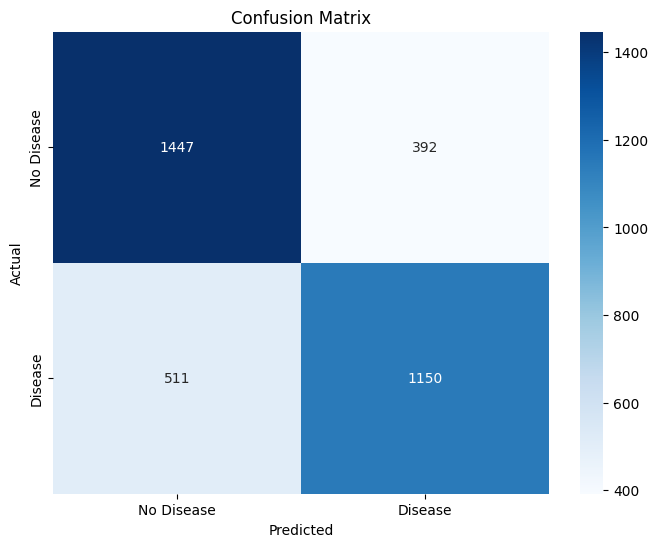

In [114]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt 
conf_matrix = confusion_matrix(y_test, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [115]:
Xgboost_classifier.delete_endpoint()


INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2025-08-02-17-18-47-593
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2025-08-02-17-18-47-593
